In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import MarkerCluster

In [2]:
cal = pd.read_csv('calendar.csv')
lis = pd.read_csv('listings.csv')
rev = pd.read_csv('reviews.csv')

In [3]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Calendar EDA

In [6]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [8]:
# Changes Data types of columns
cal['date'] = pd.to_datetime(cal['date'])
cal['price'] = cal['price'].str.replace('[^\d.]', '', regex=True)
cal['price'] = pd.to_numeric(cal['price'], errors='coerce')
cal['price'] = cal['price'].astype('Int64')

cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(1)
memory usage: 43.9+ MB


In [9]:
total_null_value = cal.isnull().sum()
null_val_per = (total_null_value/len(cal))*100
null_val_per

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

<Axes: >

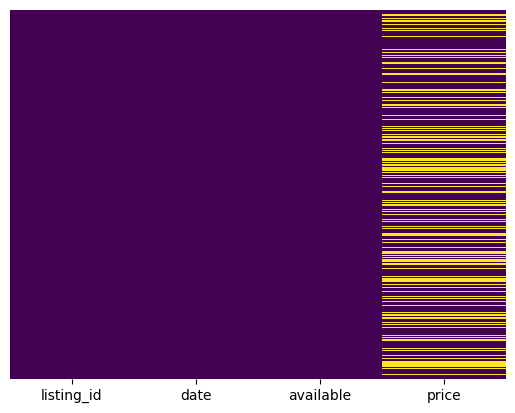

In [10]:
# Checking null values

sns.heatmap(cal.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### Price column contains a lot of null values

In [11]:
# Removing NUll values

cal = cal.dropna()

In [12]:
cal.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

<Axes: >

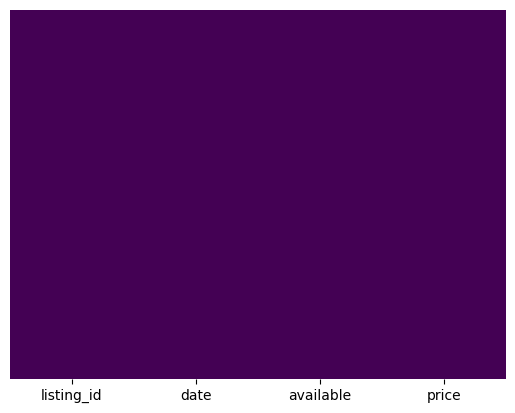

In [13]:
# Checking null values

cal.isnull().sum()
sns.heatmap(cal.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### Null values are removed.

In [14]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85
1,241032,2016-01-05,t,85
9,241032,2016-01-13,t,85
10,241032,2016-01-14,t,85
14,241032,2016-01-18,t,85


In [15]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(1)
memory usage: 36.5+ MB


<Axes: xlabel='date', ylabel='Count'>

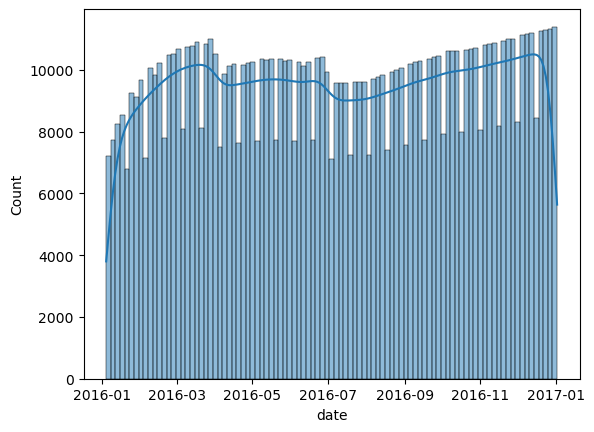

In [16]:
sns.histplot(data=cal,x='date',kde=True)

<Axes: xlabel='date', ylabel='price'>

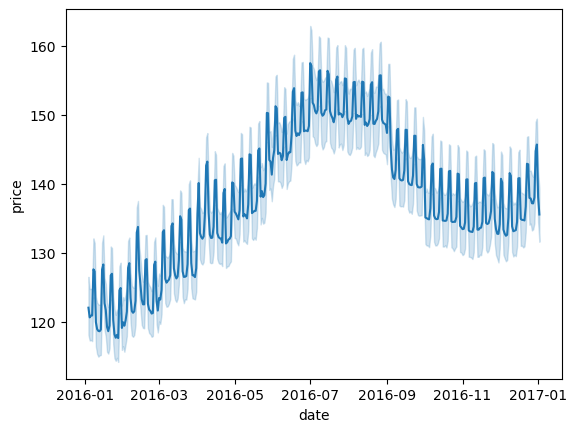

In [17]:
# sns.lineplot(data=cal,x='date',y='price')

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_5752\261348273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=cal.corr(),annot=True)


<Axes: >

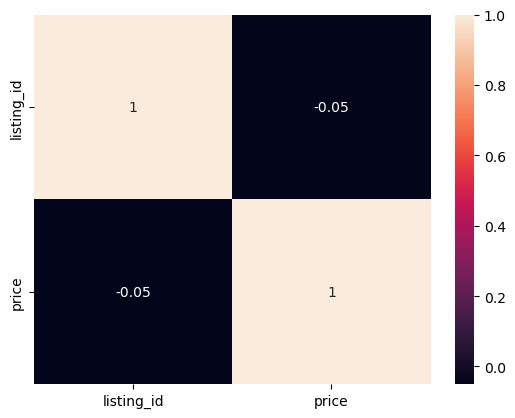

In [18]:
sns.heatmap(data=cal.corr(),annot=True)

D:\Anaconda\Lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
D:\Anaconda\Lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


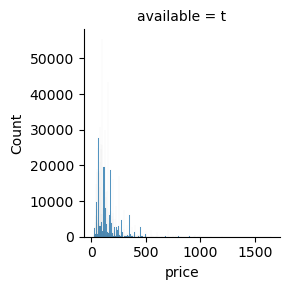

In [19]:
g = sns.FacetGrid(data=cal, col="available")
g.map(sns.histplot, "price")
plt.show()

# Reviews EDA

In [20]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [21]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [22]:
rev.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [23]:
rev.shape

(84849, 6)

In [24]:
# Changing datatype of date column

rev['date'] = pd.to_datetime(rev['date'])

In [25]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id             84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB


In [26]:
# Checking null values

rev.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

<Axes: >

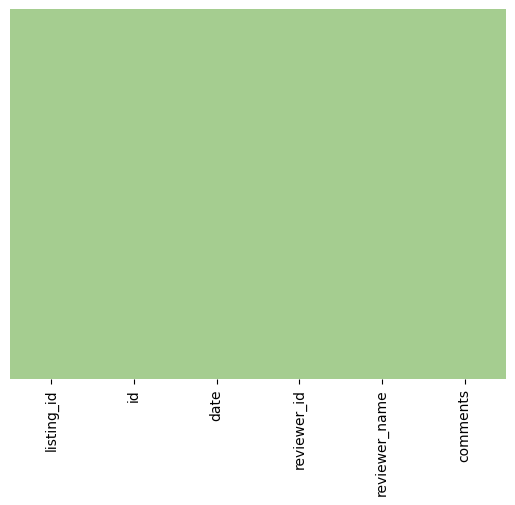

In [27]:
sns.heatmap(rev.isnull(),yticklabels=False,cbar=False,cmap='crest')

###### There's some null values in comments column but can't be shown because of very less count. We have to remove these null values.

In [28]:
rev.dropna(inplace=True)

In [29]:
rev.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

###### Null values are removed

<Axes: xlabel='date', ylabel='Count'>

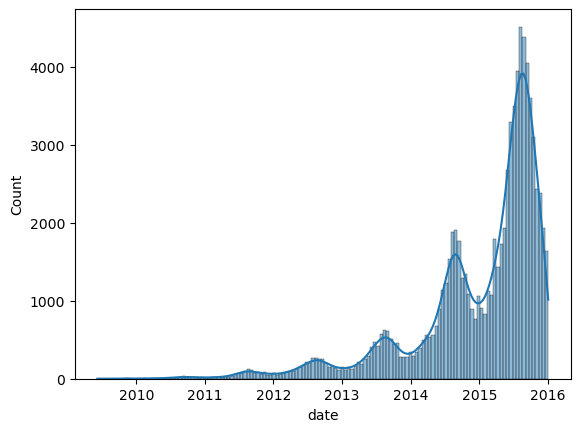

In [30]:
sns.histplot(data=rev,x='date',kde=True)

# Listings EDA

In [31]:
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [32]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [33]:
lis.shape

(3818, 92)

In [34]:
lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [35]:
cat_colm = lis.select_dtypes(include='object').columns
list(cat_colm)

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'require

In [36]:
cat_colm = lis.select_dtypes(exclude='object').columns
list(cat_colm)

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'reviews_per_month']

In [37]:
# Removing unnecesary columns

columns_to_keep = ['last_scraped','name','host_id','host_name','host_location','neighbourhood','neighbourhood_group_cleansed','city','latitude','longitude','property_type','room_type','bathrooms','bedrooms','beds','bed_type','price','weekly_price','monthly_price','security_deposit','cleaning_fee','minimum_nights','maximum_nights','availability_365','number_of_reviews','review_scores_location','reviews_per_month']
lis = lis[columns_to_keep]

In [38]:
lis.isnull().sum()

last_scraped                       0
name                               0
host_id                            0
host_name                          2
host_location                      8
neighbourhood                    416
neighbourhood_group_cleansed       0
city                               0
latitude                           0
longitude                          0
property_type                      1
room_type                          0
bathrooms                         16
bedrooms                           6
beds                               1
bed_type                           0
price                              0
weekly_price                    1809
monthly_price                   2301
security_deposit                1952
cleaning_fee                    1030
minimum_nights                     0
maximum_nights                     0
availability_365                   0
number_of_reviews                  0
review_scores_location           655
reviews_per_month                627
d

In [39]:
#Filling null values with some other values for better Analysis and results.
#Filling with String values

lis.fillna({'host_name':'absent','host_location':'Not Specified','neighbourhood':'Not Specified','neighbourhood_group_cleansed':'Not Specified','property_type':'Other','weekly_price':'0','monthly_price':'0','security_deposit':'0','cleaning_fee':'0'}, inplace=True)


In [40]:
#Filling numericals columns wih its mean.

lis.fillna({'bathrooms':lis['bathrooms'].mean(),'bedrooms':lis['bedrooms'].mean(),'beds':lis['beds'].mean(),'reviews_per_month':0,'review_scores_location':lis['review_scores_location'].mean()},inplace=True)

In [41]:
# changing DataTypes of some columns for better Analysis.

lis['last_scraped'] = pd.to_datetime(lis['last_scraped'])

lis['price'] = lis['price'].str.replace('[^\d.]', '', regex=True)
lis['price'] = pd.to_numeric(lis['price'], errors='coerce')
lis['price'] = lis['price'].astype('Int64')

lis['weekly_price'] = lis['weekly_price'].str.replace('[^\d.]', '', regex=True)
lis['weekly_price'] = pd.to_numeric(lis['weekly_price'], errors='coerce')
lis['weekly_price'] = lis['weekly_price'].astype('Int64')

lis['monthly_price'] = lis['monthly_price'].str.replace('[^\d.]', '', regex=True)
lis['monthly_price'] = pd.to_numeric(lis['monthly_price'], errors='coerce')
lis['monthly_price'] = lis['monthly_price'].astype('Int64')

lis['security_deposit'] = lis['security_deposit'].str.replace('[^\d.]', '', regex=True)
lis['security_deposit'] = pd.to_numeric(lis['security_deposit'], errors='coerce')
lis['security_deposit'] = lis['security_deposit'].astype('Int64')

lis['cleaning_fee'] = lis['cleaning_fee'].str.replace('[^\d.]', '', regex=True)
lis['cleaning_fee'] = pd.to_numeric(lis['cleaning_fee'], errors='coerce')
lis['cleaning_fee'] = lis['cleaning_fee'].astype('Int64')


In [42]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   last_scraped                  3818 non-null   datetime64[ns]
 1   name                          3818 non-null   object        
 2   host_id                       3818 non-null   int64         
 3   host_name                     3818 non-null   object        
 4   host_location                 3818 non-null   object        
 5   neighbourhood                 3818 non-null   object        
 6   neighbourhood_group_cleansed  3818 non-null   object        
 7   city                          3818 non-null   object        
 8   latitude                      3818 non-null   float64       
 9   longitude                     3818 non-null   float64       
 10  property_type                 3818 non-null   object        
 11  room_type                     

In [43]:
# Checking finally whether we have removed all the null values or not.

lis.isnull().sum()

last_scraped                    0
name                            0
host_id                         0
host_name                       0
host_location                   0
neighbourhood                   0
neighbourhood_group_cleansed    0
city                            0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
price                           0
weekly_price                    0
monthly_price                   0
security_deposit                0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_location          0
reviews_per_month               0
dtype: int64

<Axes: >

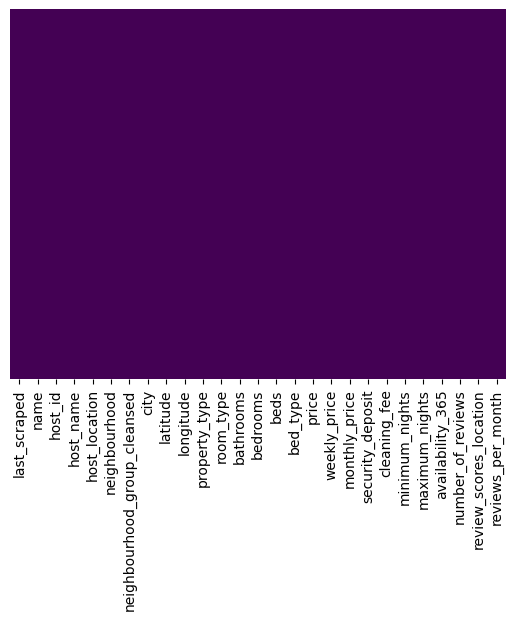

In [44]:
# Checking with heatmap

sns.heatmap(lis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
lis.head()

,last_scraped,name,host_id,host_name,host_location,neighbourhood,neighbourhood_group_cleansed,city,latitude,longitude,...,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_location,reviews_per_month
0,2016-01-04,Stylish Queen Anne Apartment,956883,Maija,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,47.636289,-122.371025,...,0,0,0,0,1,365,346,207,9.000000,4.07
1,2016-01-04,Bright & Airy Queen Anne Apartment,5177328,Andrea,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,47.639123,-122.365666,...,1000,3000,100,40,2,90,291,43,10.000000,1.48
2,2016-01-04,New Modern House-Amazing water view,16708587,Jill,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,47.629724,-122.369483,...,0,0,1000,300,4,30,220,20,10.000000,1.15
3,2016-01-04,Queen Anne Chateau,9851441,Emily,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,47.638473,-122.369279,...,650,2300,0,0,1,1125,143,0,9.608916,0.00
4,2016-01-04,Charming craftsman 3 bdm house,1452570,Emily,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,47.632918,-122.372471,...,0,0,700,125,1,1125,365,38,9.000000,0.89


In [46]:
lis.describe()

,host_id,latitude,longitude,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_location,reviews_per_month
count,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.0,3818.0,3818.0,3818.0,3818.0,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,1.578556e+07,47.628961,-122.333103,1.259469,1.307712,1.735394,127.976166,414.892614,1038.352803,140.566003,45.06286,2.369303,780.447617,244.772656,22.223415,9.608916,1.737514
std,1.458382e+07,0.043052,0.031745,0.589130,0.882700,1.139330,90.250022,551.477118,1677.470398,237.387534,49.913798,16.305902,1683.589007,126.772526,37.730892,0.572542,1.835425
min,4.193000e+03,47.505088,-122.417219,0.000000,0.000000,1.000000,20.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000
25%,3.275204e+06,47.609418,-122.354320,1.000000,1.000000,1.000000,75.0,0.0,0.0,0.0,0.0,1.000000,60.000000,124.000000,2.000000,9.000000,0.310000
50%,1.055814e+07,47.623601,-122.328874,1.000000,1.000000,1.000000,100.0,262.0,0.0,0.0,30.0,2.000000,1125.000000,308.000000,9.000000,10.000000,1.105000
75%,2.590309e+07,47.662694,-122.310800,1.000000,2.000000,2.000000,150.0,671.5,1890.0,200.0,65.0,2.000000,1125.000000,360.000000,26.000000,10.000000,2.660000
max,5.320861e+07,47.733358,-122.240607,8.000000,7.000000,15.000000,1000.0,6300.0,19500.0,5000.0,300.0,1000.000000,100000.000000,365.000000,474.000000,10.000000,12.150000


C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_5752\2303382828.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)
C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_5752\2303382828.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lis['price'])
C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_5752\2303382828.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or

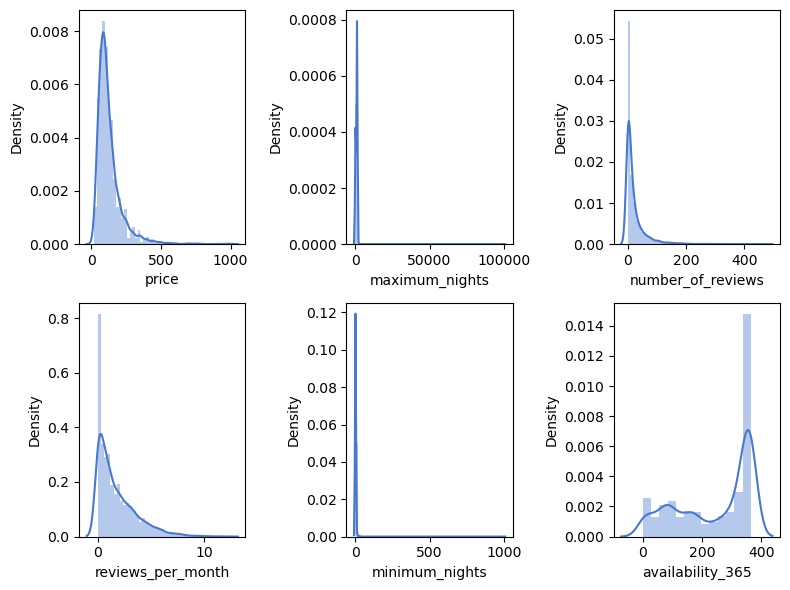

In [47]:
sns.set_palette('muted')
from pylab import *
f, ax = plt.subplots(figsize=(8,6))

subplot(2,3,1)
sns.distplot(lis['price'])

subplot(2,3,2)
sns.distplot(lis['maximum_nights'])

subplot(2,3,3)
sns.distplot(lis['number_of_reviews'])

subplot(2,3,4)
sns.distplot(lis['reviews_per_month'])

subplot(2,3,5)
sns.distplot(lis['minimum_nights'])

subplot(2,3,6)
sns.distplot(lis['availability_365'])

plt.tight_layout()
plt.draw()

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_5752\37504969.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)


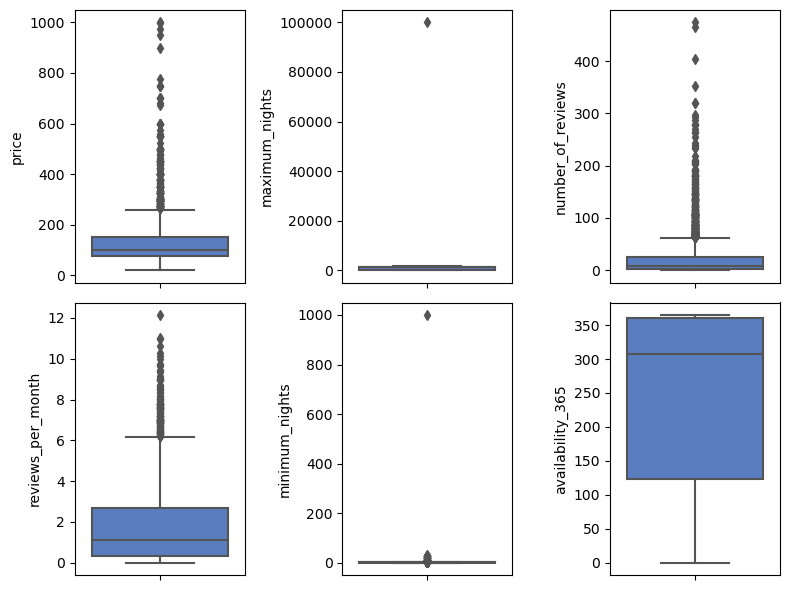

In [48]:
sns.set_palette('muted')
from pylab import *
f, ax = plt.subplots(figsize=(8,6))

subplot(2,3,1)
sns.boxplot(y = lis['price'])

subplot(2,3,2)
sns.boxplot(y = lis['maximum_nights'])

subplot(2,3,3)
sns.boxplot(y = lis['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = lis['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = lis['minimum_nights'])


subplot(2,3,6)
sns.boxplot(y = lis['availability_365'])

plt.tight_layout()
plt.draw()

In [49]:
lis['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

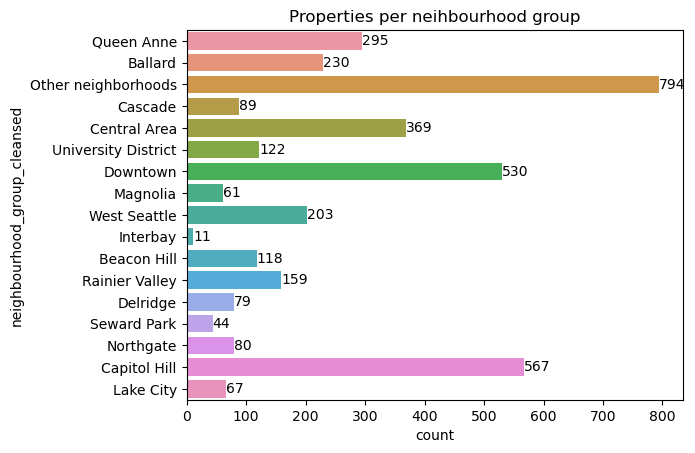

In [50]:
plt.title("Properties per neihbourhood group")
ax = sns.countplot(data=lis,y='neighbourhood_group_cleansed')
for bars in ax.containers:
    ax.bar_label(bars)

###### With a count of 567, Capitol Hill boasts the highest number of properties among the listed neighborhood groups. Following closely behind is Downtown with 530 properties.

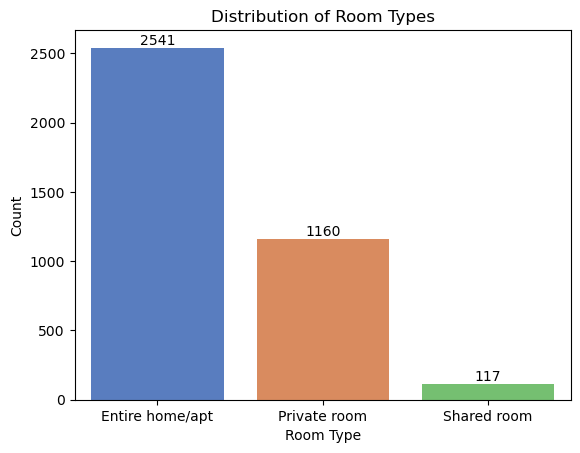

In [51]:
ax = sns.countplot(x='room_type',data=lis)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')

plt.show()

###### This category boasts the highest number of listings at 2541. This suggests a preference for independent living spaces among hosts or guests. Private rooms come in second with a count of 1160. Shared rooms are the least common type, with only 117 listings. This suggests a lower demand for shared accommodations, possibly due to privacy concerns.  
###### Entire home/apartment listings dominate the market, followed by private rooms. Shared rooms appear to be the least popular option.

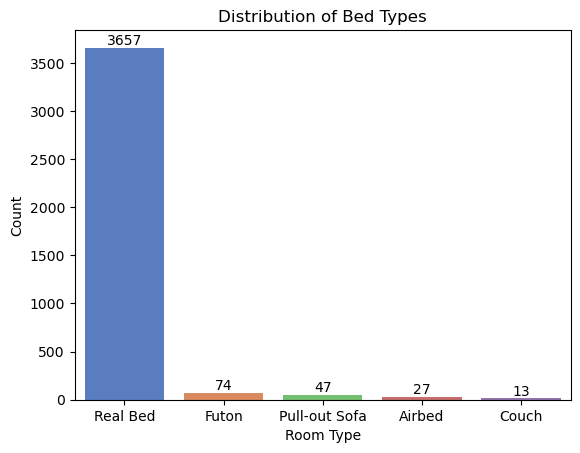

In [52]:
ax = sns.countplot(x='bed_type',data=lis)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Distribution of Bed Types')
plt.xlabel('Room Type')
plt.ylabel('Count')

plt.show()

###### As we see in above chart, Real Bed is on top in choice with count of 3657, then Futon with 74 and at last, the less choice is Couch with count of only 13.  
###### Real beds are the most popular type of bed offered on Airbnb, followed by futons and pull-out sofas. Airbeds and couches are the least common.

In [53]:
renting_purpose = lis[(lis['availability_365'] == 365) & (lis['room_type'] == 'Entire home/apt')]
renting_purpose.head()

,last_scraped,name,host_id,host_name,host_location,neighbourhood,neighbourhood_group_cleansed,city,latitude,longitude,...,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_location,reviews_per_month
4,2016-01-04,Charming craftsman 3 bdm house,1452570,Emily,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,47.632918,-122.372471,...,0,0,700,125,1,1125,365,38,9.000000,0.89
58,2016-01-04,Beautiful West Queen Anne Craftsman,23669617,Irmela,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,47.635322,-122.366121,...,2100,7500,750,120,2,1125,365,0,9.608916,0.00
91,2016-01-04,Chic 3 bed 4 bath Ballard townhome,2034501,Vivian,"Seattle, Washington, United States",Ballard,Ballard,Seattle,47.675533,-122.376324,...,1221,4200,750,300,14,60,365,0,9.608916,0.00
95,2016-01-04,Modern family home in Old Ballard,205007,Martin And Taryn,"Seattle, Washington, United States",Ballard,Ballard,Seattle,47.670976,-122.387825,...,0,0,0,75,2,10,365,10,10.000000,0.64
114,2016-01-04,Classic old Ballard home,23489864,Daniel,"Seattle, Washington, United States",Ballard,Ballard,Seattle,47.671688,-122.392559,...,0,0,0,150,5,1125,365,1,10.000000,1.00


In [54]:
renting_purpose['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    63
Capitol Hill           53
Downtown               42
Central Area           42
University District    31
Queen Anne             17
West Seattle           16
Magnolia               13
Beacon Hill            12
Ballard                11
Seward Park             9
Cascade                 6
Rainier Valley          4
Delridge                4
Northgate               4
Lake City               3
Interbay                2
Name: neighbourhood_group_cleansed, dtype: int64

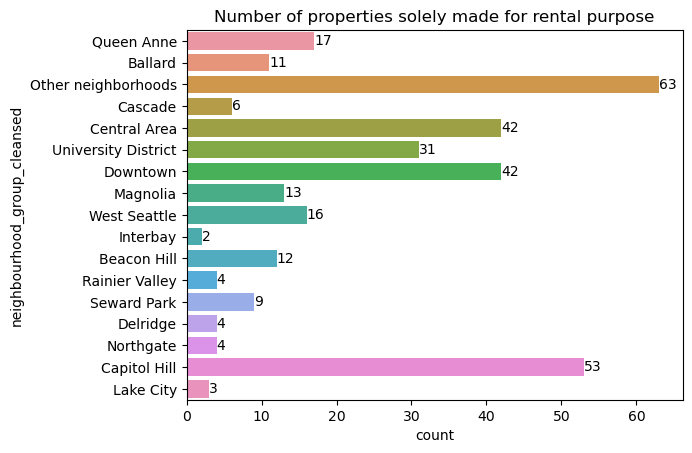

In [55]:
ax = sns.countplot(data=renting_purpose,y='neighbourhood_group_cleansed')
plt.title('Number of properties solely made for rental purpose')
for bars in ax.containers:
    ax.bar_label(bars)

###### From above chart, we can analyze that most of the neighbourhoods groups are un-specified but Capitol Hill is the 2nd highest choice then Central Area and Downtown are equal with the count of 42.

In [56]:
listing_count = lis['name'].value_counts()[:5].reset_index()
listing_count.rename(columns={'index':'Listing on AirBnb','name':'Total Listings'},inplace=True)
listing_count

,Listing on AirBnb,Total Listings
0,Capitol Hill Apartment,3
1,Luxury Apt/Downtown West Seattle,2
2,comfy room&convenient location（中英）,2
3,Capitol Hill Studio Apartment,2
4,Secluded Setting in North Seattle,2


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


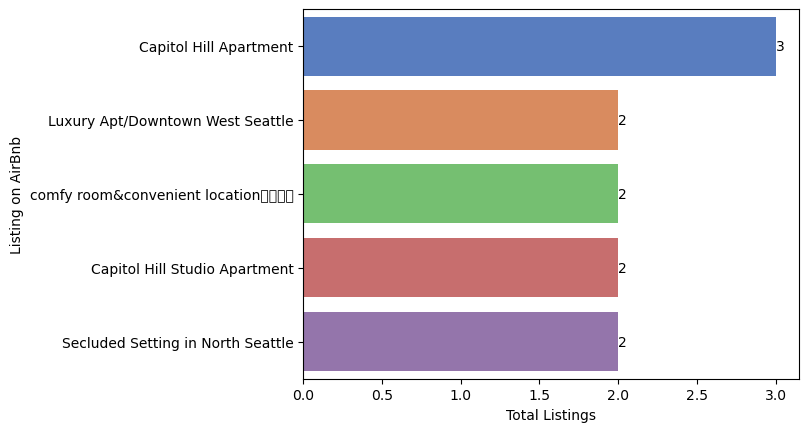

In [57]:
ax = sns.barplot(y='Listing on AirBnb',x=('Total Listings'),data=listing_count)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

###### From above chart, we can surely say that Capital Hill Apartments are top of the list with count of 3 with good rating and all others are equal with count 2. 

In [58]:
top_10_hosts = lis['host_name'].value_counts()[:10]
top_10_hosts

Andrew                56
Jordan                48
Daniela               47
Michael               46
Melissa               45
Sea To Sky Rentals    36
Eric                  33
Darik                 33
Chris                 33
Lisa                  31
Name: host_name, dtype: int64

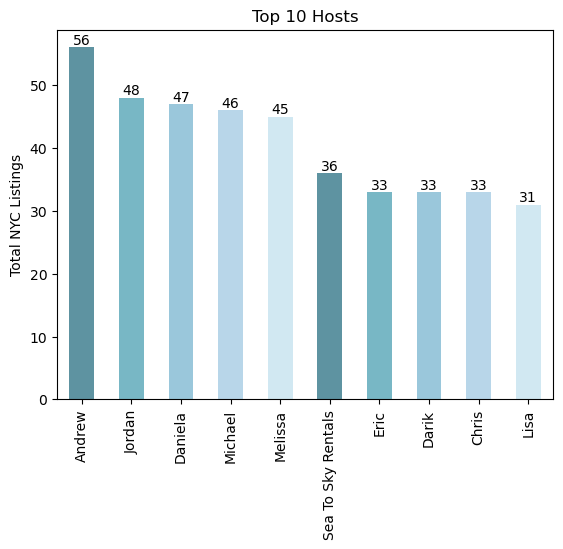

In [59]:
ax = top_10_hosts.plot(kind='bar',color=["#5E93A1", "#78B7C5", "#9AC7DB", "#B8D6E9", "#D1E8F2"])
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Top 10 Hosts')  
plt.ylabel('Total NYC Listings')
plt.show()

###### As we can see, Andres is at top among top 10 Hosts with 56 listings, then Jordan with 48, Lisa is at number 10 with 31 count.

In [60]:
lis['neighbourhood'].unique()

array(['Queen Anne', 'Not Specified', 'Ballard', 'Phinney Ridge',
       'Fremont', 'Lower Queen Anne', 'Westlake', 'Wallingford',
       'Green Lake', 'Minor', 'Madrona', 'Harrison/Denny-Blaine',
       'Leschi', 'University District', 'Roosevelt', 'Madison Park',
       'Capitol Hill', 'Atlantic', 'North Beacon Hill',
       'Central Business District', 'Pike Place Market', 'Pike Market',
       'Eastlake', 'Portage Bay', 'South Lake Union', 'Magnolia',
       'Belltown', 'International District', 'Yesler Terrace',
       'First Hill', 'Pioneer Square', 'Gatewood', 'The Junction',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill', 'Genesee',
       'Fairmount Park', 'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North D

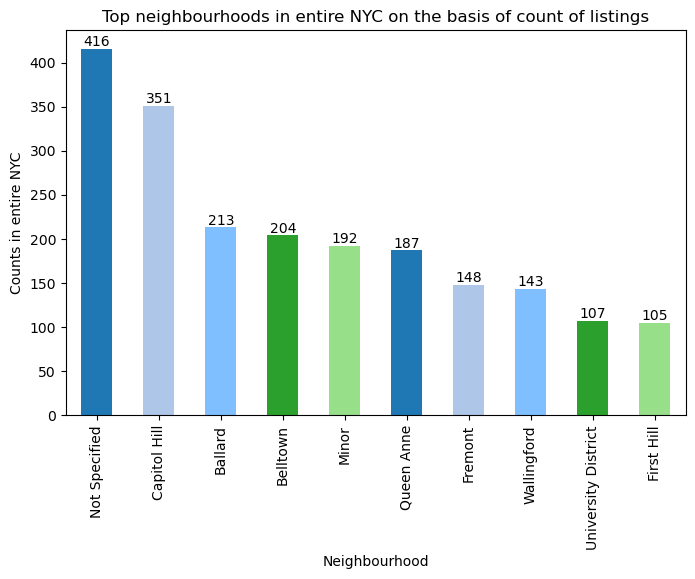

In [61]:
top_10_neighb = lis['neighbourhood'].value_counts()[:10]
ax = top_10_neighb.plot(kind='bar',color=["#1f77b4", "#aec7e8", "#7fbfff", "#2ca02c", "#98df8a"],figsize=(8,5))
plt.xlabel('Neighbourhood')
plt.ylabel('Counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

###### From above chart, we can analyze that Capitol Hill is at number 2 with 351 listing counts. First hill is at number 10 with 105 listings.

Text(0.5, 0, 'Room counts')

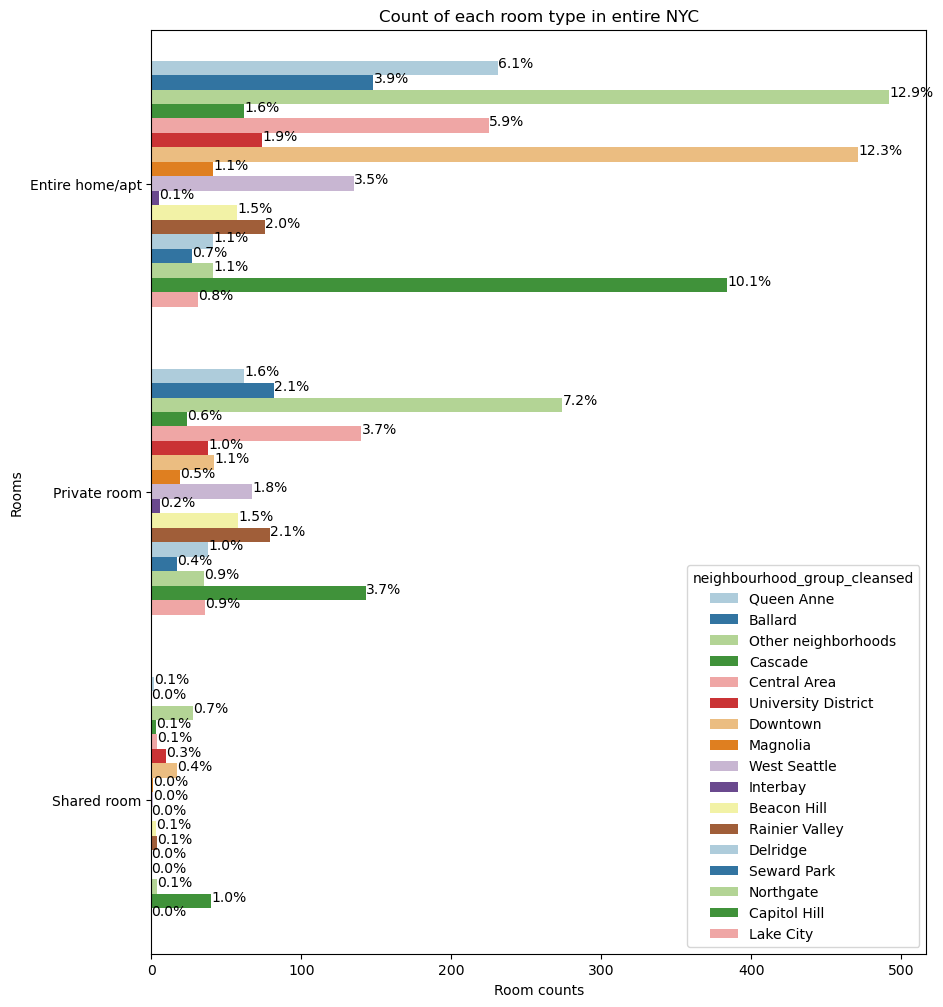

In [62]:
plt.rcParams['figure.figsize']=(10,12)
ax = sns.countplot(y='room_type',hue='neighbourhood_group_cleansed',data=lis,palette='Paired')
total = len(lis['room_type'])
for p in ax.patches:
    per = '{:.1f}%'.format(100*p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(per,(x,y))
    
plt.title('Count of each room type in entire NYC')
plt.ylabel('Rooms')
plt.xlabel('Room counts')

###### From above chart, we can see that in Entire Home/Apartment category Downtown has secured 2nd number with 12.3% and Cascade is at 3rd number with 10.1%. In Private Room category, Central Area and Cascade is on top with 2.7%. Shared Room percentage is more less than other two categories but Cascade is on top in Shared Room category with 1.0%. We are not considering other neighbourhoods counts because we don't know more details about that.

In [63]:
areas_reviews = lis.groupby(['neighbourhood_group_cleansed'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews',ascending=False)
areas_reviews = areas_reviews.head(10)

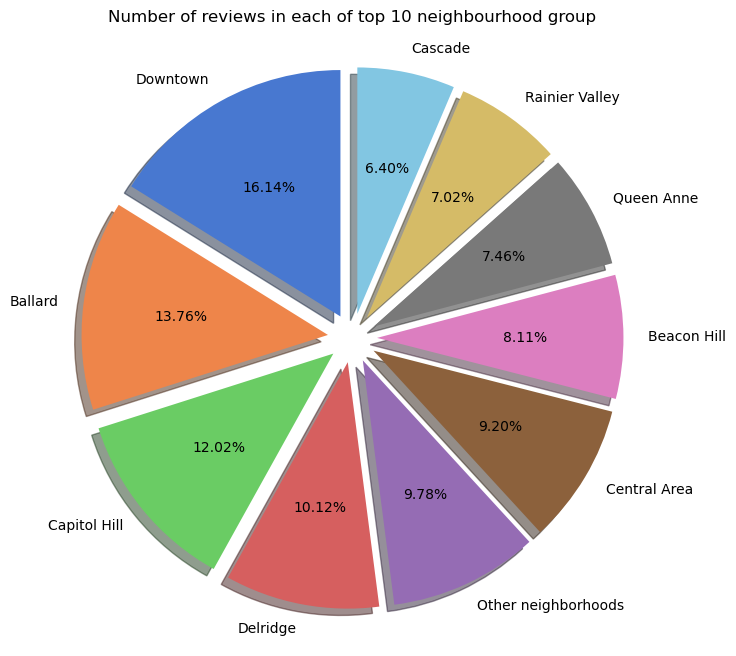

In [64]:
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews,labels=areas_reviews['neighbourhood_group_cleansed'],autopct='%0.2f%%',startangle=90,explode=[0.1]*10,shadow=True)
plt.title('Number of reviews in each of top 10 neighbourhood group')
plt.show()

###### From Above pie chart, 